In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Compile_Label_Data.xlsx')

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [4]:
y = df['Label']
X_train, X_val, y_train, y_val = train_test_split(df['Lemma'], y, test_size=0.3, stratify=y, random_state=42)

In [5]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [6]:
batch_size = 1000
X_train_batches = [X_train[i:i+batch_size] for i in range(0, X_train.shape[0], batch_size)]
y_train_batches = [y_train[i:i+batch_size] for i in range(0, y_train.shape[0], batch_size)]

In [7]:
rf = RandomForestClassifier(n_estimators=300,min_samples_split= 2, random_state=42,class_weight='balanced')
for i in range(len(X_train_batches)):
    rf.fit(X_train_batches[i], y_train_batches[i])

In [8]:
y_pred = rf.predict(X_val)
print(f"Batch {i+1} classification report:")
print(classification_report(y_val, y_pred))

Batch 90 classification report:
              precision    recall  f1-score   support

           0       0.42      0.30      0.35     17605
           1       0.52      0.65      0.58     20621

    accuracy                           0.49     38226
   macro avg       0.47      0.47      0.46     38226
weighted avg       0.47      0.49      0.47     38226



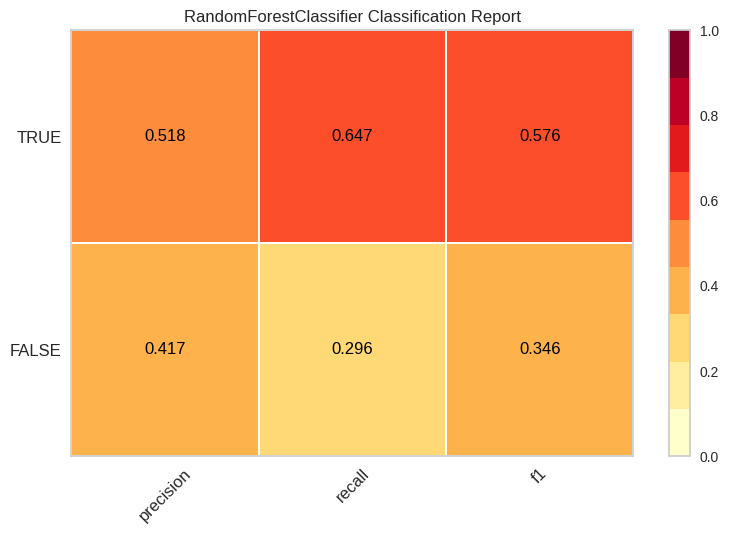

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [10]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train_batches[i], y_train_batches[i])
visualizer.score(X_val, y_val)
visualizer.show()

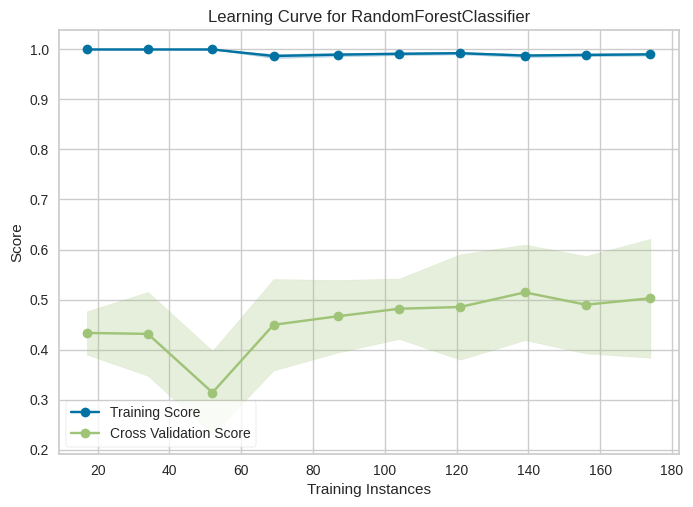

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [11]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    rf, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train_batches[i], y_train_batches[i])
lc_viz.show()

In [12]:
import random


random_index = random.randint(0, len(df)-1)
text =df.iloc[random_index]['Lemma']
text_transformed = vectorizer.transform([text])
label_pred = rf.predict(text_transformed)
print("Text: ", text)
if label_pred == 1:
    print('The text is classified as TRUE')
else:
    print('The text is classified as FALSE')
#print("Predicted Label: ", label_pred[0])

Text:    DUBAI Reuters Iranian Iraqi central government force hold joint military exercise near border Iran state television report Saturday part Tehran effort support Baghdad Kurdish independence referendum State television quote military spokesman say decision hold war game take meeting Iranian military commander also agree measure establish border security receive Iraqi force station border post
The text is classified as TRUE


In [13]:
from sklearn.model_selection import GridSearchCV
rf_params={'bootstrap': [True, False],
          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}



In [ ]:
rf_grid = GridSearchCV(rf, rf_params, cv=3,n_jobs=1)
rf_grid.fit(X_train, y_train)
print("Random forest best params:", rf_grid.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest